### Bank Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, balanced_accuracy_score, precision_score, precision_recall_curve, f1_score, fbeta_score, recall_score, roc_curve, roc_auc_score
import joblib

In [2]:
bank = pd.read_csv('Bank_Modeling.csv')
bank

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,age_group,pdays_group,Deposit
0,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,55-64,Not Previous Contacted,0
1,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,35-44,Not Previous Contacted,0
2,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,25-34,Not Previous Contacted,0
3,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,35-44,Not Previous Contacted,0
4,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,0,25-34,Not Previous Contacted,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,45-54,Not Previous Contacted,1
43189,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,65+,Not Previous Contacted,1
43190,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,65+,144 to 282 days,1
43191,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,55-64,Not Previous Contacted,0


## Standardization

In [3]:
bank_std = bank.copy()

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(bank_std[['balance', 'day', 'duration', 'campaign', 'previous']])

StandardScaler()

In [6]:
bank_std[['balance', 'day', 'duration', 'campaign', 'previous']] = scaler.transform(bank_std[['balance', 'day', 'duration', 'campaign', 'previous']])
bank_std

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,age_group,pdays_group,Deposit
0,management,married,tertiary,no,0.259354,yes,no,cellular,-1.301418,may,0.010368,-0.573827,-0.250730,55-64,Not Previous Contacted,0
1,technician,single,secondary,no,-0.435568,yes,no,cellular,-1.301418,may,-0.415726,-0.573827,-0.250730,35-44,Not Previous Contacted,0
2,entrepreneur,married,secondary,no,-0.444443,yes,yes,cellular,-1.301418,may,-0.706245,-0.573827,-0.250730,25-34,Not Previous Contacted,0
3,management,married,tertiary,no,-0.369166,yes,no,cellular,-1.301418,may,-0.462209,-0.573827,-0.250730,35-44,Not Previous Contacted,0
4,management,single,tertiary,no,-0.298161,yes,yes,cellular,-1.301418,may,-0.160070,-0.573827,-0.250730,25-34,Not Previous Contacted,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,technician,married,tertiary,no,-0.173904,no,no,cellular,0.143343,nov,2.783852,0.078925,-0.250730,45-54,Not Previous Contacted,1
43189,retired,divorced,primary,no,0.123262,no,no,cellular,0.143343,nov,0.765716,-0.247451,-0.250730,65+,Not Previous Contacted,1
43190,retired,married,secondary,no,1.433555,no,no,cellular,0.143343,nov,3.364890,0.731677,1.035364,65+,144 to 282 days,1
43191,blue-collar,married,secondary,no,-0.225513,no,no,telephone,0.143343,nov,0.967143,0.405301,-0.250730,55-64,Not Previous Contacted,0


## Label Encoding

In [7]:
bank_encode = bank_std.copy()

In [8]:
label_encoder_X = LabelEncoder()

In [9]:
bank_encode['job'] = label_encoder_X.fit_transform(bank_encode['job'])
bank_encode['marital'] = label_encoder_X.fit_transform(bank_encode['marital'])
bank_encode['default'] = label_encoder_X.fit_transform(bank_encode['default'])
bank_encode['housing'] = label_encoder_X.fit_transform(bank_encode['housing'])
bank_encode['pdays_group'] = label_encoder_X.fit_transform(bank_encode['pdays_group'])
bank_encode['loan'] = label_encoder_X.fit_transform(bank_encode['loan'])
bank_encode['contact'] = label_encoder_X.fit_transform(bank_encode['contact'])

In [10]:
labelOE_ed = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']])
labelOE_mo = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
labelOE_age = OrdinalEncoder(categories=[['17-24', '25-34', '35-44', '45-54', '55-64', '65+']])

In [11]:
bank_encode['education'] = labelOE_ed.fit_transform(bank_encode[['education']])
bank_encode['month'] = labelOE_mo.fit_transform(bank_encode[['month']])
bank_encode['age_group'] = labelOE_age.fit_transform(bank_encode[['age_group']])

In [12]:
bank_encode['education'] = bank_encode['education'].apply(lambda x : int(x))
bank_encode['month'] = bank_encode['month'].apply(lambda x : int(x))
bank_encode['age_group'] = bank_encode['age_group'].apply(lambda x: int(x))
bank_encode

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,age_group,pdays_group,Deposit
0,4,1,2,0,0.259354,1,0,0,-1.301418,4,0.010368,-0.573827,-0.250730,4,4,0
1,9,2,1,0,-0.435568,1,0,0,-1.301418,4,-0.415726,-0.573827,-0.250730,2,4,0
2,2,1,1,0,-0.444443,1,1,0,-1.301418,4,-0.706245,-0.573827,-0.250730,1,4,0
3,4,1,2,0,-0.369166,1,0,0,-1.301418,4,-0.462209,-0.573827,-0.250730,2,4,0
4,4,2,2,0,-0.298161,1,1,0,-1.301418,4,-0.160070,-0.573827,-0.250730,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,9,1,2,0,-0.173904,0,0,0,0.143343,10,2.783852,0.078925,-0.250730,3,4,1
43189,5,0,0,0,0.123262,0,0,0,0.143343,10,0.765716,-0.247451,-0.250730,5,4,1
43190,5,1,1,0,1.433555,0,0,0,0.143343,10,3.364890,0.731677,1.035364,5,1,1
43191,1,1,1,0,-0.225513,0,0,1,0.143343,10,0.967143,0.405301,-0.250730,4,4,0


## Predicting for Deposit Features

Part I - Split the Dataset.

In [13]:
data = bank_encode.copy()

In [14]:
x = data.drop(columns='Deposit')
y = data['Deposit']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(30235, 12958, 30235, 12958)

In [17]:
model_logis = LogisticRegression(solver='liblinear')
model_logis.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
model_tree = tree.DecisionTreeClassifier(max_depth=3)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
## Model comparison with Cross Validation
logistic_score = np.mean(cross_val_score(model_logis, X_test, y_test, cv=5, scoring='accuracy')) * 100
tree_score = np.mean(cross_val_score(model_tree, X_test, y_test, cv=5, scoring='accuracy')) * 100
forest_score = np.mean(cross_val_score(model_forest, X_test, y_test, cv=5, scoring='accuracy')) * 100
print(f'Logistic Regression score: {logistic_score}%\nDecision Tree score: {tree_score}%\nRandomForestClassifier score: {forest_score}%')

Logistic Regression score: 89.21901429926002%
Decision Tree score: 88.68652052927753%
RandomForestClassifier score: 89.46595765970524%


## Evaluation metrics before hyperparameter tuning

<b>Logistic Regression </b>

In [21]:
y_pred_log = model_logis.predict(X_test)

In [22]:
confusion_matrix(y_test, y_pred_log, labels=[1,0])

array([[  336,  1177],
       [  231, 11214]], dtype=int64)

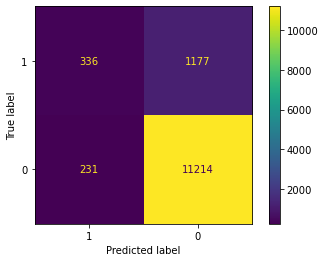

In [23]:
plot_confusion_matrix(model_logis, X_test, y_test, values_format='0.0f', labels=[1, 0])

In [24]:
print('Logistic Regression Report:  \n', classification_report(y_test, y_pred_log))

Logistic Regression Report:  
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11445
           1       0.59      0.22      0.32      1513

    accuracy                           0.89     12958
   macro avg       0.75      0.60      0.63     12958
weighted avg       0.87      0.89      0.87     12958



In [25]:
print('Balanced-Acc: ', round(balanced_accuracy_score(y_test, y_pred_log) * 100, 2), '%')
print('Precision: ', round(precision_score(y_test, y_pred_log, pos_label=0) * 100, 2), '%')
print('Recall: ', round(recall_score(y_test, y_pred_log, pos_label=0) * 100, 2), '%')
print('F1 Score: ', round(f1_score(y_test, y_pred_log, pos_label=0) * 100, 2), '%')
print('ROC & AUC score: ', round(roc_auc_score(y_test, y_pred_log) * 100, 2), '%')

Balanced-Acc:  60.09 %
Precision:  90.5 %
Recall:  97.98 %
F1 Score:  94.09 %
ROC & AUC score:  60.09 %


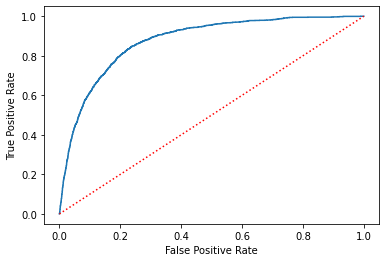

In [26]:
fpr_log, tpr_log, thresh_log = roc_curve(y_test, model_logis.predict_proba(X_test)[:, 1])
plt.plot(fpr_log, tpr_log)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<b>Decision Tree Classifier</b>

In [27]:
y_pred_tree = model_tree.predict(X_test)

In [28]:
confusion_matrix(y_test, y_pred_tree, labels=[1, 0])

array([[  353,  1160],
       [  274, 11171]], dtype=int64)

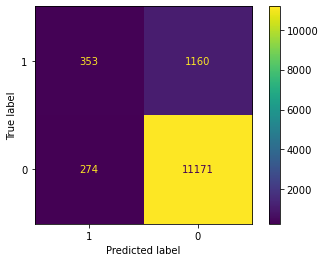

In [29]:
plot_confusion_matrix(model_tree, X_test, y_test, values_format='0.0f', labels=[1, 0])

In [30]:
print('Decision Tree Report: \n', classification_report(y_test, y_pred_tree))

Decision Tree Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11445
           1       0.56      0.23      0.33      1513

    accuracy                           0.89     12958
   macro avg       0.73      0.60      0.63     12958
weighted avg       0.87      0.89      0.87     12958



In [32]:
print('Balanced-Acc: ', round(balanced_accuracy_score(y_test, y_pred_tree) * 100, 2), '%')
print('ROC & AUC: ', round(roc_auc_score(y_test, y_pred_tree) * 100, 2), '%')

Balanced-Acc:  60.47 %
ROC & AUC:  60.47 %


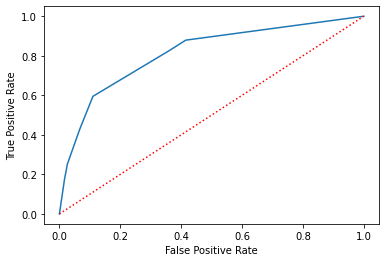

In [34]:
fpr_tree, tpr_tree, thresh_tree = roc_curve(y_test, model_tree.predict_proba(X_test)[:,1])
plt.plot(fpr_tree, tpr_tree)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<b>Random Forest Classifier</b>

In [35]:
y_pred_rf = model_forest.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred_rf, labels=[1,0])

array([[  540,   973],
       [  317, 11128]], dtype=int64)

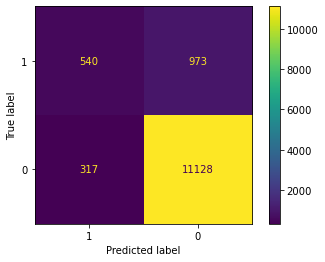

In [37]:
plot_confusion_matrix(model_forest, X_test, y_test, values_format='0.0f', labels=[1,0])

In [38]:
print('Random Forest Report: \n', classification_report(y_test, y_pred_rf))

Random Forest Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11445
           1       0.63      0.36      0.46      1513

    accuracy                           0.90     12958
   macro avg       0.77      0.66      0.70     12958
weighted avg       0.89      0.90      0.89     12958



In [40]:
print('ROC & AUC: ', round(roc_auc_score(y_test, y_pred_rf) * 100, 2), '%')
print('Precision: ', round(precision_score(y_test, y_pred_rf) * 100, 2), '%')
print('Recall: ', round(recall_score(y_test, y_pred_rf) * 100, 2), '%')
print('F1 score: ', round(f1_score(y_test, y_pred_rf) * 100, 2), '%')

ROC & AUC:  66.46 %
Precision:  63.01 %
Recall:  35.69 %
F1 score:  45.57 %


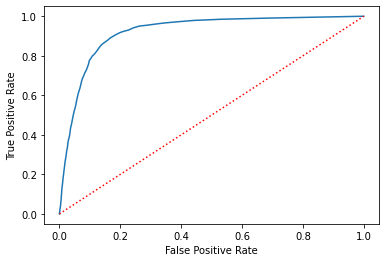

In [42]:
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, model_forest.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Logistic Regression Hyperparameter Tuning

In [43]:
param_log = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01]}

In [44]:
model_rs_log = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions = param_log, random_state=12)
model_rs_log.fit(X_train, y_train)
model_rs_log.best_params_

C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py

C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


{'solver': 'saga', 'penalty': 'l1', 'C': 0.01}

In [45]:
model_bar_log = LogisticRegression(solver='saga', penalty='l1', C=0.01)
model_bar_log.fit(X_train, y_train)
print(f'Logistic Regression tuning: {model_bar_log.score(X_test, y_test)}')

Logistic Regression tuning: 0.8902608427226424


### Decision Tree Hyperparameter Tuning

In [46]:
param_tree = {'max_depth': [3, None],
             'max_features': [random.randint(1, 9)],
             'min_samples_leaf': [random.randint(1, 9)],
             'criterion': ['gini', 'entropy']}

In [47]:
model_rs_tree = RandomizedSearchCV(estimator=tree.DecisionTreeClassifier(), param_distributions=param_tree, random_state=40)
model_rs_tree.fit(X_train, y_train)
model_rs_tree.best_params_

C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 3, 'criterion': 'gini'}

In [48]:
model_bar_tree = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_features = 7, max_depth=3, criterion='gini')
model_bar_tree.fit(X_train, y_train)
print(f'Decision Tree tuning: {model_bar_tree.score(X_test, y_test)}')

Decision Tree tuning: 0.885707670936873


### Random Forest Hyperparameter Tuning

In [49]:
param_rf = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split':[2, 5, 10],
           'n_estimators': [100, 200]}

In [50]:
models_rs_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions = param_rf, random_state=101)
models_rs_rf.fit(X_train, y_train)
models_rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [51]:
model_bar_rf = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=50, bootstrap=True)
model_bar_rf.fit(X_train, y_train)
print(f'Random Forest tuning: {model_bar_rf.score(X_test, y_test)}')

Random Forest tuning: 0.8999845655193702


In [52]:
Logistic_Tuned = np.mean(cross_val_score(model_bar_log, X_test, y_test, cv=5, scoring='accuracy')) * 100
Tree_Tuned = np.mean(cross_val_score(model_bar_tree, X_test, y_test, cv=5, scoring='accuracy')) * 100
Forest_Tuned = np.mean(cross_val_score(model_bar_rf, X_test, y_test, cv=5, scoring='accuracy')) * 100
print(f'Logistic Regression Score: {Logistic_Tuned}%\nDecision Tree Score: {Tree_Tuned}%\n Random Forest Score: {Forest_Tuned}%')

C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rxbro\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Logistic Regression Score: 88.86400455517914%
Decision Tree Score: 88.44726939405636%
 Random Forest Score: 89.51227778016019%


## Evaluation Metrics after Tuning

<b>Logistic Regression</b>

In [53]:
y_pred_log = model_bar_log.predict(X_test)

In [54]:
confusion_matrix(y_test, y_pred_log, labels=[1,0])

array([[  292,  1221],
       [  201, 11244]], dtype=int64)

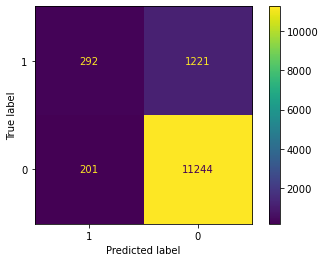

In [55]:
plot_confusion_matrix(model_bar_log, X_test, y_test, values_format='0.0f', labels=[1,0])

In [56]:
print('Logistic Regression Report: \n', classification_report(y_test, y_pred_log))

Logistic Regression Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11445
           1       0.59      0.19      0.29      1513

    accuracy                           0.89     12958
   macro avg       0.75      0.59      0.62     12958
weighted avg       0.87      0.89      0.86     12958



In [57]:
print('ROC & AUC: ', round(roc_auc_score(y_test, y_pred_log) * 100, 2), '%')
print('Precision: ', round(precision_score(y_test, y_pred_log) * 100, 2), '%')
print('Recall: ', round(recall_score(y_test, y_pred_log) * 100, 2), '%')
print('F1 Score: ', round(f1_score(y_test, y_pred_log) * 100, 2), '%')

ROC & AUC:  58.77 %
Precision:  59.23 %
Recall:  19.3 %
F1 Score:  29.11 %


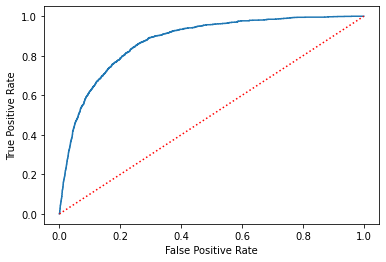

In [58]:
fpr_log, tpr_log, thresh_log = roc_curve(y_test, model_bar_log.predict_proba(X_test)[:,1])
plt.plot(fpr_log, tpr_log)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<b>Decision Tree Classifier</b>

In [59]:
y_pred_tree = model_bar_tree.predict(X_test)

In [60]:
confusion_matrix(y_test, y_pred_tree, labels=[1,0])

array([[  255,  1258],
       [  223, 11222]], dtype=int64)

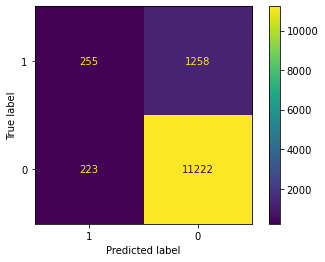

In [62]:
plot_confusion_matrix(model_bar_tree, X_test, y_test, values_format='0.0f', labels=[1,0])

In [63]:
print('Decision Tree Report: \n', classification_report(y_test, y_pred_tree))

Decision Tree Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11445
           1       0.53      0.17      0.26      1513

    accuracy                           0.89     12958
   macro avg       0.72      0.57      0.60     12958
weighted avg       0.86      0.89      0.86     12958



In [64]:
print('ROC & AUC: ', round(roc_auc_score(y_test, y_pred_tree) * 100, 2), '%')
print('Precision: ', round(precision_score(y_test, y_pred_tree) * 100, 2), '%')
print('Recall: ', round(recall_score(y_test, y_pred_tree) * 100, 2), '%')
print('F1 Score: ', round(f1_score(y_test, y_pred_tree) * 100, 2), '%')

ROC & AUC:  57.45 %
Precision:  53.35 %
Recall:  16.85 %
F1 Score:  25.62 %


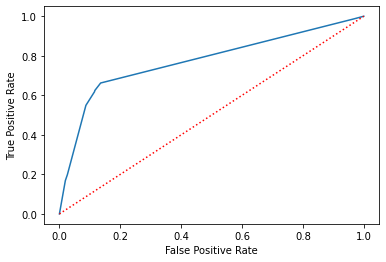

In [65]:
fpr_tree, tpr_tree, thresh_tree = roc_curve(y_test, model_bar_tree.predict_proba(X_test)[:,1])
plt.plot(fpr_tree, tpr_tree)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<b>Random Forest Classifier</b>

In [66]:
y_pred_rf = model_bar_rf.predict(X_test)

In [67]:
confusion_matrix(y_test, y_pred_rf, labels=[1, 0])

array([[  536,   977],
       [  319, 11126]], dtype=int64)

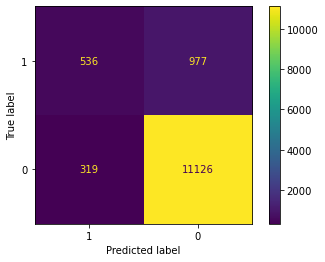

In [68]:
plot_confusion_matrix(model_bar_rf, X_test, y_test, values_format='0.0f', labels=[1, 0])

In [69]:
print('Random Forest Report: \n', classification_report(y_test, y_pred_rf))

Random Forest Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11445
           1       0.63      0.35      0.45      1513

    accuracy                           0.90     12958
   macro avg       0.77      0.66      0.70     12958
weighted avg       0.89      0.90      0.89     12958



In [70]:
print('ROC & AUC Score: ', round(roc_auc_score(y_test, y_pred_rf) * 100, 2), '%')
print('Precision Score: ', round(precision_score(y_test, y_pred_rf) * 100, 2), '%')
print('Recall Score: ', round(recall_score(y_test, y_pred_rf) * 100, 2), '%')
print('F1 Score: ', round(f1_score(y_test, y_pred_rf) * 100, 2), '%')

ROC & AUC Score:  66.32 %
Precision Score:  62.69 %
Recall Score:  35.43 %
F1 Score:  45.27 %


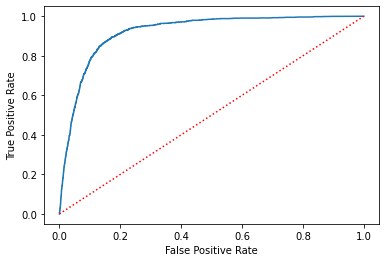

In [72]:
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, model_bar_rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Overall, the Random Forest Tuned has the best performance compared to the other models.  We will choose this model.

In [73]:
dfBanding = pd.DataFrame({'ytest': y_test, 'RF Tuned Prediction': y_pred_rf})

In [74]:
dfBanding

,ytest,RF Tuned Prediction
40440,1,0
8897,0,0
2969,0,0
2863,0,0
5080,0,0
...,...,...
35606,0,0
36994,0,0
25893,0,0
33379,0,0


In [75]:
TruePred = len(dfBanding[dfBanding['ytest'] == dfBanding['RF Tuned Prediction']])
TruePred

11662

In [76]:
print(f'Percent of Correct Predictions: {round((TruePred/len(dfBanding) * 100), 2)} %')

Percent of Correct Predictions: 90.0 %


From the model, the model can correctly predict 90% of the existing dataset.

## Feature Importance

In [77]:
importances = model_bar_rf.feature_importances_
col_importances = list(zip(x.columns, importances))

In [78]:
col_importances = sorted(col_importances, key = lambda i: i[1], reverse=True)
col_importances

[('duration', 0.3424581815651314),
 ('balance', 0.11918626853908146),
 ('day', 0.1130899200750501),
 ('month', 0.09729268544962719),
 ('age_group', 0.0540308814108952),
 ('job', 0.051861988335499876),
 ('campaign', 0.04159766620764774),
 ('previous', 0.041236546050796574),
 ('pdays_group', 0.0372464184553535),
 ('housing', 0.03149563477595471),
 ('marital', 0.024209998872991533),
 ('education', 0.023146018970765566),
 ('loan', 0.01165435161833061),
 ('contact', 0.00916384490029668),
 ('default', 0.002329594772578015)]

In [79]:
joblib.dump(model_bar_rf, "model_LE", compress=True)

['model_LE']

In [81]:
joblib.dump(scaler.fit(bank[['balance', 'duration', 'day', 'campaign', 'previous']]), 'Scaler2')

['Scaler2']